## Extraindo as **componentes principais** passo a passo

Vamos aqui aplicar inicialmente os seguintes passos para extração das componentes principais:
  1. Normalização dos dados;

  2. Construir a matriz de covariância dos dados;

  3. Obter os autovalores e autovetores da matriz de covariância;

  4. Ordenar os autovalores por ordem decrescente e fazer a correspondência com os autovetores.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.shape

(178, 14)

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

In [11]:
X.shape

(178, 13)

In [9]:
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.3,
                   stratify=y,
                   random_state=0)

### 1. Normalizando nossas features

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### 2. Construção da matriz de covariância

Vamos obter a nossa matriz simétrica de covariância dos dados de dimensão $d \times d$, sendo $d$ a dimensão dos nossos dados.

A covariâcia entre duas features $x_j$ e $x_k$ será dada por

$$ \sigma_{jk} = (1/n)\sum_{i=1}^n (x_j^{(i)}-\mu_j)(x_k^{(i)}-\mu_k) $$

, onde $\mu_{k/j}$ são as respectivas médias das features. Notemos ainda que se normalizarmos nossos dados nossas médias serão nulas.

Deste modo nossa matriz de covariância será dada por

\begin{align}
\Sigma = 
\begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \sigma_{13} \\
\sigma_{21} & \sigma_{22}^2 & \sigma_{23} \\
\sigma_{31} & \sigma_{22} & \sigma_{33}^2 \\
\end{bmatrix}
\end{align}

Os autovetores associados aos autovalores serão nossas <b>componentes principais</b>, enquanto que nossos autovalores as magnitudes correspondentes. 

No caso do dataset "Wine" teremos $13$ autovetores.

### 3. Obtendo os autovalores e autovetores da matriz de correlação

Como sabemos, para obtermos os autovalores e autovetores associados a um operador basta tomarmos um escalar $\lambda$ tal que para algum vetor $x$ teremos:

$$ \Sigma x = \lambda x .$$

Obs.: Não vamos nos esquecer que queremos obter os autovalores e autovetores justamente para comprimir nosso espaço de features num espaço novo, menor ou igual ao antigo, no qual nossos autovetores contenham o máximo de informação possível (variância).

In [12]:
import numpy as np

In [13]:
cov_matrix = np.cov(X_train_std.T)

In [14]:
cov_matrix

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

In [15]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [16]:
print("\nEigenValues \n%s" % eigen_values)


EigenValues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [17]:
print("\nEigenVectors \n%s" % eigen_vectors)


EigenVectors 
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953989e-01 -1.10845657e-01
   1.99483410e-01]
 [-1.54365821e-01  2.89745182e-01  1.96135481e-01 -3.67511070e-01
   6.76487073e-01  6.57772614e-02 -4.05268966e-01  

In [18]:
import matplotlib.pyplot as plt

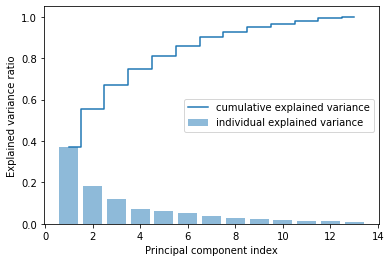

In [19]:
tot = sum(eigen_values)
var_exp = [(i / tot) for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

## Feature transformation

Vamos agora seguir os últimos passos para a decomposição dos nossos dados em componentes principais. São eles:

  5. Selecionar os $k$ autovetores correspondentes aos $k$ maiores autovalores, sendo $k$ a dimensão do novo espaço gerador;

  6. Construir a matriz de projeção $W$ com os autovetores selecionados acima;

  7. Transformar os dados de input $X$ via projeção $W$.

### 4 e 5. Selecioando os autovalores e autovetores

Obs.: No nosso caso estaremos interessados numa visualização 2-dimensional, de modo que iremos selecionar duas componentes principais (que representam $60%$ da variância/informação dos nossos dados).

Mas lembre que de modo geral o número $k$ de autovetores que selecionamos depende de um *trade-off* entre eficiência computacional e performance do nosso classificador.

In [21]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]

# Sorting the eigen_pairs do maior para o menor
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [22]:
eigen_pairs

[(4.8427453156558915,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352246,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203502,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977349,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578446,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114

### 6. Construindo a matriz de projeção $W$

In [23]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [24]:
print("Matrix W:\n", w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


### 7. Transformando os dados

Podemos agora aplicar nossa transformação para projetarmos nossos dados no novo espaço gerados pelas componentes principais selecionadas via

$$ x' = x W $$

, onde aqui $x$ representa uma features de dimensão $1 \times 13$.

Logo, para todo nosso conjunto de dados teremos nossa projeção dada por

$$ X' = X W .$$

In [25]:
X_train_pca = X_train_std.dot(w)

In [26]:
print("Dimensões do conjunto de treino antes:\n", X_train_std.shape)
print("Dimensões do conjunto de treino com PCA:\n", X_train_pca.shape)

Dimensões do conjunto de treino antes:
 (124, 13)
Dimensões do conjunto de treino com PCA:
 (124, 2)


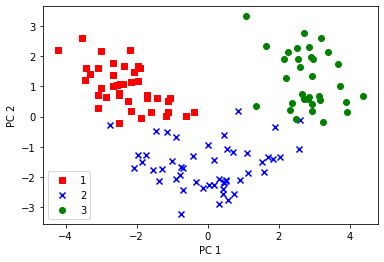

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers): 
  plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

## PCA com scikit-learn

In [27]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
    y=X[y == cl, 1],
    alpha=0.6,
    c=cmap(idx),
    edgecolor='black',
    marker=markers[idx],
    label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


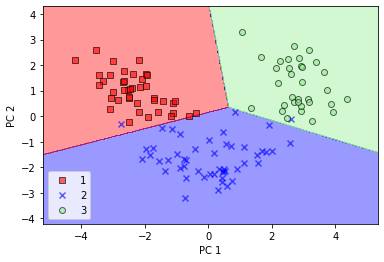

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression()

# Aplicando o fit_transform no conjunto de treino
X_train_pca = pca.fit_transform(X_train_std)

# Usando o transform para aplicar os mesmo parâmetros do fit anterior
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()